# Evaluierung der Übersetzungsqualität

In [1]:
# Imports
import os
import re
import json
import pandas as pd
import textstat
import spacy
import language_tool_python
from collections import Counter
from transformers import BertTokenizer, BertModel
from joblib import Parallel, delayed
from tqdm import tqdm
from deep_translator import GoogleTranslator
import torch
from torch.nn.functional import cosine_similarity
import matplotlib.pyplot as plt

# Ändere 1000 auf die gewünschte Breite
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

# Zu untersuchende Sprache festlegen
lang = "de-DE"
textstat.set_lang(lang)

# Laden der Sprachen
df_language = pd.read_csv('Sprachen.csv')

# Laden des Modells und des Tokenizers (Es könnten hier auch andere Modelle herangezogen werden, je nach Fokus)
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased')

c:\Users\sandra.nuissl\Desktop\EvaluationOfTranslation\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Pfad der JSONS ermitteln
folder = "Data/atticus/"
list_files = os.listdir(folder)

# Laden der Files
data = []
for path in list_files:
    path_complete = folder + "//" + path
    with open(path_complete,'r', encoding="utf-8-sig") as file:
        obj = json.load(file)
        data.append(obj)

# Extraktion der Deutschen Übersetzungen aus den JSON Files
data_container = {
    'Language': [],
    'Source-Text':[],
    'Translation': [],
  }

# Auslesen der Dictionaries
for obj in data:
    for el in obj:
      for translation in el["Translations"]:
          source_text = el["Text"]
          translated_text = translation['Text']
          lang = translation['Language'].split('-')[0]
          data_container["Language"].append(lang)
          data_container["Source-Text"].append(source_text)
          data_container["Translation"].append(translated_text)

# Speichern in einen Data Frame
df_res = pd.DataFrame.from_dict(data_container)

# Analysieren der File Struktur und Inhalte
# Identifikation der Sprachen
# Definition einer Funktion zur Ermittlung der Sprachen
def extract_languages(translation):
    languages = []
    number_language = range(len(translation))
    for items in number_language:
        language = translation[items]['Language']
        languages.append(language)
    return languages

# Ermittlung der Sprachen in den JSONs
translation = obj[0]['Translations']
language = extract_languages(translation)

# Filese
print(f"Anzahl der Files: {len(list_files)}")
print(f"Anzahl der Sprachen: {len(obj[0]['Translations'])}")
print(f"Erste 5 Sprachen: {language[:5]}")

# Datentypen und Keys
# Erste Hierarchie
print("")
print("Datentypen und Keys: JSON")
print(f"Datentyp des JSON: {type(obj)}")
print(f"Datentypen der Elemente der JSON: {type(obj[0])}")
print(f"Anzahl der Dictionaries in der JSON: {len(obj)}")
print(f"Keys der Dictionaries: {obj[0].keys()}")

# Datentypen und Keys: Translations
print("")
print("Datentypen und Keys: Translations")
print(f"Datentypen: {type(obj[0]['Translations'])}")
print(f"Anzahl der Dictionaries in der JSON: {len(obj[0]['Translations'])}")
print(f"Keys der Dictionaries: {obj[0]['Translations'][0].keys()}")


Anzahl der Files: 2802
Anzahl der Sprachen: 38
Erste 5 Sprachen: ['ar-001', 'bg-BG', 'cs-CZ', 'da-DK', 'de-DE']

Datentypen und Keys: JSON
Datentyp des JSON: <class 'list'>
Datentypen der Elemente der JSON: <class 'dict'>
Anzahl der Dictionaries in der JSON: 4
Keys der Dictionaries: dict_keys(['Key', 'MachineTranslated', 'SourceLanguage', 'Text', 'Translations'])

Datentypen und Keys: Translations
Datentypen: <class 'list'>
Anzahl der Dictionaries in der JSON: 38
Keys der Dictionaries: dict_keys(['Language', 'Text'])


# Analyse der deutschen Übersetzungen

In [3]:
# Herausfiltern der deutschen Übersetzungen
# Hinzufügen der ausgeschriebenen Ländernamen
df_merged = pd.merge(df_res, df_language, on='Language', how='left').drop(columns=['Language']).rename(columns={'language_name': 'Language'})
df_german_raw = df_merged[df_merged['Language'] == 'German']

# Duplikate entfernen
df_german = df_german_raw.drop_duplicates(subset="Source-Text").reset_index().drop(columns=['index'])

# Ausgabe
print(f"Die geladenen Files enthalten {len(df_merged)} Texte.")
print(f"Hiervon sind {len(df_german_raw)} Texte auf deutsch.")
print(f"Werden die Duplikate entfernt, bleiben {len(df_german)} eintigartige Texte über.")
print("")
print(f"Data Frame mit den einzigartigen Deutschen Übersetzungen:")
df_german

Die geladenen Files enthalten 617769 Texte.
Hiervon sind 16356 Texte auf deutsch.
Werden die Duplikate entfernt, bleiben 7630 eintigartige Texte über.

Data Frame mit den einzigartigen Deutschen Übersetzungen:


,Source-Text,Translation,Language
0,"Model number: 11PRO FGSports category: FOOTBALL/SOCCERLimited-collection 11Pro boots, with a recreation of the original upper.Step into the journey of the 11Pro boots and commemorate their 10th-anniversary launch with this exclusive limited edition. The 11Pro Firm Ground boots are part of a collection that celebrates the unbreakable bond between a football player and his footwear. Crafted with meticulous attention to detail, the modern Copa Pure firm ground outsole stabilizes movement, while the Taurus leather upper creates a soft touch and optimal comfort. The lace closure design provides a secure fit and recreates the design of the boots that German playmaker Toni Kroos fell in love with all those years ago.SPECIFICATIONSRegular fitLace closureFirm ground outsoleTouchpodsSensepodsTaurus leather upperArticle numbers: IG0776DETAILSRetail entry: 15 Oct 2023","Modellnummer: 11PRO FGSportkategorie: FOOTBALL/FUSSBALLLimitierte 11Pro-Kollektion mit einer Nachbildung des Original-Obermaterials.Mit dieser exklusiven, limitierten Auflage feiern wir das 10-jährige Jubiläum der 11Pro-Stiefel. Die 11Pro Firm Ground-Stiefel sind Teil einer Kollektion, die die untrennbare Verbindung zwischen einem Fußballspieler und seinem Schuhwerk zelebriert. Die mit viel Liebe zum Detail gefertigte moderne Copa Pure Firm Ground-Außensohle stabilisiert die Bewegung, während das Obermaterial aus Taurus-Leder einen weichen Griff und optimalen Komfort bietet. Der Schnürverschluss sorgt für einen sicheren Sitz und ist dem Design der Schuhe nachempfunden, in die sich der deutsche Spielmacher Toni Kroos vor vielen Jahren verliebt hat.SPEZIFIKATIONENNormale PassformSchnürverschlussFeste LaufsohleTouchpodsSensepodsObermaterial aus Taurus-LederArtikel-Nummern: IG0776DETAILSEintritt in den Einzelhandel: 15 Okt 2023",German
1,DOWNLOAD PRODUCT SHEET,PRODUKTDATENBLATT HERUNTERLADEN,German
2,Have a question or suggestion? Ask below!,Haben Sie eine Frage oder Anregung? Fragen Sie unten!,German
3,Ask a Question,Eine Frage stellen,German
4,"Model number: WU661Sports category: CoreA quarter-zip pullover done in cosy fleece material.With comfort as a foundation, there's a lot you can do. Which includes doing absolutely nothing other than enjoying it. This adidas sweatshirt is down for whatever mode you choose to sink into. Fast, slow or somewhere in between — soft fleece material makes sure you feel good no matter what you're doing. Our cotton products support more sustainable cotton farming.SPECIFICATIONSRegular fitQuarter zip with ribbed stand-up collar82% cotton, 18% recycled polyester fleeceRibbed cuffs and hemSupports the Better Cotton InitiativeArticle number: HG2074, HN1945, HN1942DETAILSRETAIL ENTRY: 2022-08-15SUSTAINABILITY: ""BETTER COTTON""","Modellnummer: WU661Sportkategorie: CoreEin Viertel-Reißverschluss-Pullover aus kuscheligem Fleecematerial.Mit Komfort als Grundlage kann man eine Menge machen. Dazu gehört auch, absolut nichts zu tun, außer es zu genießen. Dieses Sweatshirt von adidas ist für jeden Modus geeignet, in den du dich stürzen willst. Schnell, langsam oder irgendwo dazwischen - das weiche Fleece-Material sorgt dafür, dass du dich wohlfühlst, egal was du tust. Unsere Baumwollprodukte unterstützen den nachhaltigen Baumwollanbau.SPEZIFIKATIONENNormale PassformViertelreißverschluss mit geripptem Stehkragen82% Baumwolle, 18% recyceltes Polyester-FleeceGerippte Bündchen und SaumUnterstützt die Better Cotton InitiativeArtikel-Nummer: HG2074, HN1945, HN1942DETAILSHANDELSEINGANG: 2022-08-15NACHHALTIGKEIT: ""BESSERE BAUMWOLLE""",German
...,...,...,...
7625,"Model number: LZQ25 Sport category: SKATEBOARDING Skate-style shoes with clean and classic design. Head out for the day, and know that these adidas shoes can handle whatever you throw at them. Modernising a classic look, they have slightly higher tooling and a sleek shape. The premium leather upper provides easy-wearing comfort. The durable rubber outsole gives you tr

# Konsistenz der Übersetzungen

In [5]:
# Konsistente Übersetzung prüfen (Vergleich der uniquen Dublikate)
# Herausfiltern der Dublikate im Source Text
counts = df_german_raw['Source-Text'].value_counts()
df_duplicates = df_german_raw[df_german_raw['Source-Text'].isin(counts[counts > 1].index)].reset_index(drop=True)

# Duplikate entfernen (Wenn im deutschen die Dublikate gelöscht werden und nur die Uniquate übrig bleiben, wird konsistent übersetzt)
df_dropduplicates_german = df_duplicates.drop_duplicates(subset="Translation").reset_index().drop(columns=['index'])
df_dropduplicates_english = df_duplicates.drop_duplicates(subset="Source-Text").reset_index().drop(columns=['index'])

# Ausgabe (Verleich der länge der DataFrames)
print(f"Die Länge des DataFrames, welcher keine uniquen Texte enthält, beträgt {len(df_duplicates)} Zeilen.")
print(f"Die englischen Texte haben {len(df_dropduplicates_english)} unique Werte in der Liste der Dublikate.")
print(f"Die deutschen Texte haben {len(df_dropduplicates_german)} unique Werte in der Liste der Dublikate.")
print(f"Damit wurden {len(df_dropduplicates_german)-len(df_dropduplicates_english)} nicht konsistent übersetzt")
print("")
print("DataFrame, welcher alle Dublikate des Source Textes enhält mit den zugehörigen deutschen Übersetzunge:")
df_duplicates

Die Länge des DataFrames, welcher keine uniquen Texte enthält, beträgt 9022 Zeilen.
Die englischen Texte haben 296 unique Werte in der Liste der Dublikate.
Die deutschen Texte haben 337 unique Werte in der Liste der Dublikate.
Damit wurden 41 nicht konsistent übersetzt

DataFrame, welcher alle Dublikate des Source Textes enhält mit den zugehörigen deutschen Übersetzunge:


,Source-Text,Translation,Language
0,DOWNLOAD PRODUCT SHEET,PRODUKTDATENBLATT HERUNTERLADEN,German
1,Have a question or suggestion? Ask below!,Haben Sie eine Frage oder Anregung? Fragen Sie...,German
2,Ask a Question,Eine Frage stellen,German
3,DOWNLOAD PRODUCT SHEET,PRODUKTDATENBLATT HERUNTERLADEN,German
4,Have a question or suggestion? Ask below!,Haben Sie eine Frage oder Anregung? Fragen Sie...,German
...,...,...,...
9017,Have a question or suggestion? Ask below!,Haben Sie eine Frage oder Anregung? Fragen Sie...,German
9018,Ask a Question,Eine Frage stellen,German
9019,DOWNLOAD PRODUCT SHEET,PRODUKTDATENBLATT HERUNTERLADEN,German
9020,Have a question or suggestion? Ask below!,Haben Sie eine Frage oder Anregung? Fragen Sie...,German


In [5]:
# Filtern der Dublikate, welche nicht konsistent übersetzt wurden
# Kombiniere die Werte der beiden Spalten
df_combined = df_duplicates.copy()
df_combined['Combined'] = df_duplicates['Source-Text'].astype(str) + '_' + df_duplicates['Translation'].astype(str)

# Löschen der Duplikate in den Textkombinationen
df_unique_combine = df_combined.drop_duplicates(subset='Combined').drop(columns=['Combined']).reset_index(drop=True)

# Beibehalten aller Duplikate des Sourcetextes
df_unique_german = df_unique_combine[df_unique_combine["Source-Text"].duplicated(keep=False)]

# Liste der nicht konsistenten englischen Texte
df_not_consistent_englisch = df_unique_german.drop_duplicates(subset='Source-Text')
source_text_list = df_not_consistent_englisch['Source-Text'].tolist()

# Filtern des Data Frames nach unterschiedlichen Übersetzungen
filtered_df = df_unique_german[df_unique_german['Source-Text'] == 'Have a question or suggestion? Ask below!']

# Ausgabe
print(f"Von {len(df_german_raw)} Texten auf deutsch wurden {len(df_not_consistent_englisch)} englische Texte wurden nicht konsistent übersetzt.")
print("")
print(f"Auszug aus der Liste der nicht konsistent übersetzten Wörter:")
print(source_text_list[:5])
print("")
print("Beispiel für nicht konsistente Übersetzung:")
filtered_df

Von 16356 Texten auf deutsch wurden 45 englische Texte wurden nicht konsistent übersetzt.

Auszug aus der Liste der nicht konsistent übersetzten Wörter:
['DOWNLOAD PRODUCT SHEET', 'Have a question or suggestion? Ask below!', 'Ask a Question', 'ASK A QUESTION', 'This collection features apparel, accessories and footwear utilising the following sustainability concepts. ']

Beispiel für nicht konsistente Übersetzung:


,Source-Text,Translation,Language
1,Have a question or suggestion? Ask below!,Haben Sie eine Frage oder Anregung? Fragen Sie...,German
4,Have a question or suggestion? Ask below!,Have a question or suggestion? Ask below!,German
99,Have a question or suggestion? Ask below!,Haben Sie eine Frage oder einen Vorschlag? Fra...,German
151,Have a question or suggestion? Ask below!,Hast du eine Frage oder Anregung? Frage uns un...,German


In [ ]:
# Speichern der Liste in einer Textdatei
with open('Nicht_Konsistent.txt', 'w', encoding='utf-8') as file:
    for item in source_text_list:
        file.write(f"{item}\n")

# Similarity
= Ähnlichkeit der Inhalte (Ausgangssprache vs. Zielsprache)

In [6]:
def compute_similarity(source_sentence, translated_sentence):
    try:
        # Tokenize Sätze
        source_inputs = tokenizer(source_sentence, return_tensors='pt')
        translated_inputs = tokenizer(translated_sentence, return_tensors='pt')

        # Daten embedding
        with torch.no_grad():
            source_outputs = model(**source_inputs)
            translated_outputs = model(**translated_inputs)

        # Anwendung des Embeddings
        source_embedding = source_outputs.last_hidden_state.mean(dim=1)
        translated_embedding = translated_outputs.last_hidden_state.mean(dim=1)

        # Similarity Score kalkulieren
        similarity = cosine_similarity(source_embedding, translated_embedding)
        return similarity.item()

    except Exception as e:
        # Fehlerbehandlung, z.B. Logging oder Rückgabe eines Standardwerts
        print(f"Error computing similarity: {e}")
        return None

# Andwenden der Funktion auf DataFrame
df_german['Similarity'] = df_german.apply(lambda row: compute_similarity(row['Source-Text'], row['Translation']), axis=1)

Token indices sequence length is longer than the specified maximum sequence length for this model (659 > 512). Running this sequence through the model will result in indexing errors


Error computing similarity: The size of tensor a (659) must match the size of tensor b (512) at non-singleton dimension 1
Error computing similarity: The size of tensor a (536) must match the size of tensor b (512) at non-singleton dimension 1
Error computing similarity: The size of tensor a (537) must match the size of tensor b (512) at non-singleton dimension 1
Error computing similarity: The size of tensor a (516) must match the size of tensor b (512) at non-singleton dimension 1
Error computing similarity: The size of tensor a (513) must match the size of tensor b (512) at non-singleton dimension 1
Error computing similarity: The size of tensor a (523) must match the size of tensor b (512) at non-singleton dimension 1
Error computing similarity: The size of tensor a (672) must match the size of tensor b (512) at non-singleton dimension 1
Error computing similarity: The size of tensor a (592) must match the size of tensor b (512) at non-singleton dimension 1
Error computing similari

In [7]:
# Ausgabe
df_german

,Source-Text,Translation,Language,Similarity
0,Model number: 11PRO FGSports category: FOOTBAL...,Modellnummer: 11PRO FGSportkategorie: FOOTBALL...,German,0.889560
1,DOWNLOAD PRODUCT SHEET,PRODUKTDATENBLATT HERUNTERLADEN,German,0.828875
2,Have a question or suggestion? Ask below!,Haben Sie eine Frage oder Anregung? Fragen Sie...,German,0.752260
3,Ask a Question,Eine Frage stellen,German,0.572832
4,Model number: WU661Sports category: CoreA quar...,Modellnummer: WU661Sportkategorie: CoreEin Vie...,German,0.816727
...,...,...,...,...
7625,Model number: LZQ25 Sport category: SKATEBOARD...,Modellnummer: LZQ25 Sportkategorie: SKATEBOARD...,German,0.833399
7626,Model number: MDU22Sports category: SKATEBOARD...,Modellnummer: MDU22Sport Kategorie: SKATEBOARD...,German,0.840492
7627,Model number: LIJ40Sports category: GOLFComfor...,Modellnummer: LIJ40Sportkategorie: GOLFKomfort...,German,0.834809
7628,Model number: MDV17Sports category: SWIMUnique...,Modellnummer: MDV17Sportkategorie: SCHWIMMENEi...,German,0.844966


In [8]:
nan_rows = df_german[df_german['Similarity'].isna()]
nan_rows

,Source-Text,Translation,Language,Similarity
187,3D printing as a technology has a very long hi...,Der 3D-Druck als Technologie hat bei adidas ei...,German,NaN
195,WHAT’S NEW & STORYTELLING4DFWD symbolizes the ...,WAS IST NEU &amp; STORYTELLING4DFWD symbolisie...,German,NaN
196,WHAT’S NEW & STORYTELLING4DFWD symbolizes the ...,WAS IST NEU &amp; STORYTELLING4DFWD symbolisie...,German,NaN
400,Model number: EEP92 Sport category: ORIGINALS ...,Modellnummer: EEP92 Kategorie Sport: ORIGINALS...,German,NaN
422,Model number: BZ905 Sport category: ORIGINALS ...,Modellnummer: BZ905 Sport Kategorie: ORIGINALS...,German,NaN
...,...,...,...,...
7371,Model number: LYY75 Sport category: FOOTBALL|S...,Modellnummer: LYY75 Sportkategorie: FUSSBALL|S...,German,NaN
7372,Model number: LYY77 Sport category: FOOTBALL|S...,Modellnummer: LYY77 Sportkategorie: FUSSBALL|S...,German,NaN
7374,Model number: MBX73 Sport category: FOOTBALL|S...,Modell-Nummer: MBX73 Sportkategorie: FUSSBALL|...,German,NaN
7622,Model number: LIR48 Sport category: GOLF An ul...,Modellnummer: LIR48 Sportkategorie: GOLF Ein u...,German,NaN


C:\Users\sandra.nuissl\AppData\Local\Temp\ipykernel_14316\215199213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_similarity['Similarity'] = df_similarity['Similarity'].round(1)


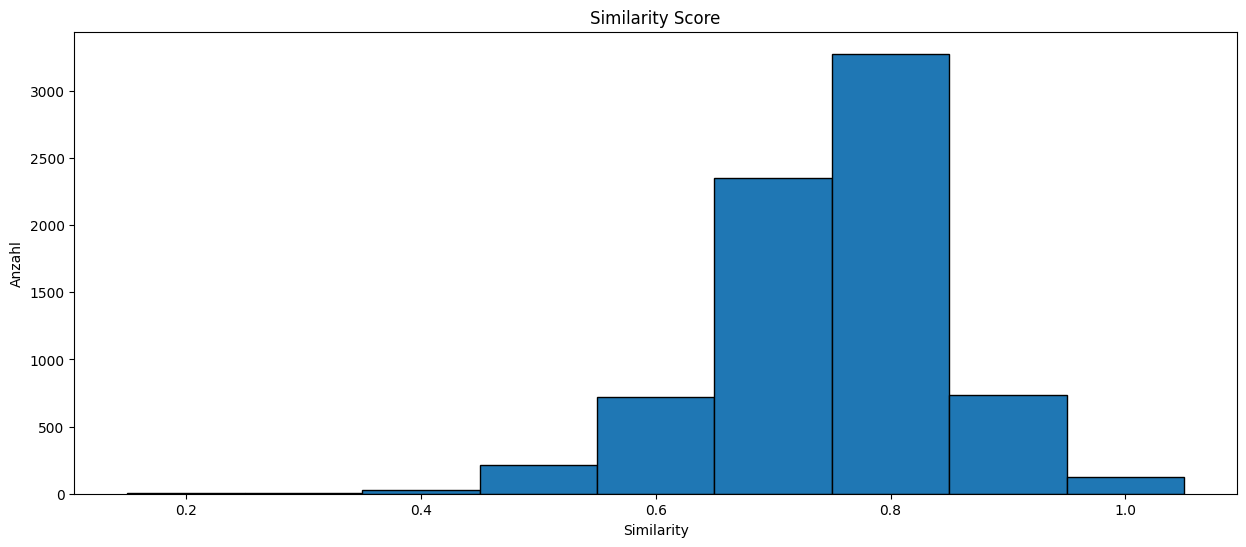

In [24]:
# Graphik
df_similarity = df_german.dropna()
df_similarity['Similarity'] = df_similarity['Similarity'].round(1)

# Gruppieren nach Score Stufen
similarity_grouped_df = df_similarity.groupby('Similarity')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(similarity_grouped_df['Similarity'], similarity_grouped_df['Anzahl'], width=0.1, edgecolor='black')
plt.title("Similarity Score")
plt.xlabel('Similarity')
plt.ylabel('Anzahl')
plt.show()

In [15]:
similar = df_similarity[df_similarity['Similarity'] == 0.3][['Translation', 'Source-Text']]
print(similar)

                      Translation      Source-Text
2969                      Spanien            Spain
5141                   Hält Hitze    Holds in heat
6600   Vollständige Palette sehen   See Full Range
6608  Vollständige Palette sehen   See Full Range 
7400                 Fersensperre        Heel lock


# Similarity Score nach Rückübersetzung

In [30]:
# Behalten der Zeilen, für welche ein Similarity Score berechnet werden konnte
df_cleaned = df_similarity.dropna(subset=['Similarity']).reset_index(drop=True)
print(f"Die Länge des bereinigte Data Frames beträgt {len(df_cleaned)} Zeilen.")

Die Länge des bereinigte Data Frames beträgt 7469 Zeilen.


In [31]:
# Funktion zur Übersetzung
def translate_text(text):
    try:
        # Versuche, den Text zu übersetzen
        translated_sentences = GoogleTranslator(source='auto', target='en').translate(text)
    except Exception as e:
        print(f"Die Übersetzung als ganzes hat nicht geklappt, weshalb der Text in die Sätze untergliedert wird.")
        try:
            sentences = text.split(".")
            results = []
            for s in sentences:
                s = s.strip()
                if s:
                    result = GoogleTranslator(source='auto', target='en').translate(s)
                    results.append(result)
            translated_sentences = ". ".join(results)
        except Exception as e:   
            print(f"Der Text konnte nicht übersetzt werden: {e}")
            translated_sentences = ""
    # Ausgabe
    return translated_sentences

In [32]:
# Parallelverarbeitung mit Fortschrittsanzeige
df_cleaned['backtranslated_column'] = Parallel(n_jobs=-1)(delayed(translate_text)(text) for text in tqdm(df_cleaned['Translation'], desc="Status Übersetzung", total = len(df_cleaned)))

Status Übersetzung: 100%|██████████| 7469/7469 [07:18<00:00, 17.03it/s]


In [33]:
# Ausgabe
df_cleaned

,Source-Text,Translation,Language,Similarity,backtranslated_column
0,Model number: 11PRO FGSports category: FOOTBAL...,Modellnummer: 11PRO FGSportkategorie: FOOTBALL...,German,0.9,Model Number: 11PRO FGSport Category: FOOTBALL...
1,DOWNLOAD PRODUCT SHEET,PRODUKTDATENBLATT HERUNTERLADEN,German,0.8,DOWNLOAD PRODUCT DATA SHEET
2,Have a question or suggestion? Ask below!,Haben Sie eine Frage oder Anregung? Fragen Sie...,German,0.8,Do you have a question or suggestion? Ask below!
3,Ask a Question,Eine Frage stellen,German,0.6,Ask a question
4,Model number: WU661Sports category: CoreA quar...,Modellnummer: WU661Sportkategorie: CoreEin Vie...,German,0.8,Model number: WU661Sport category: CoreA quart...
...,...,...,...,...,...
7464,Model number: EYY32 Sport category: ORIGINALS ...,Modellnummer: EYY32 Sport Kategorie: ORIGINALS...,German,0.8,Model Number: EYY32 Sport Category: ORIGINALS ...
7465,Model number: LZQ25 Sport category: SKATEBOARD...,Modellnummer: LZQ25 Sportkategorie: SKATEBOARD...,German,0.8,Model Number: LZQ25 Sport Category: SKATEBOARD...
7466,Model number: MDU22Sports category: SKATEBOARD...,Modellnummer: MDU22Sport Kategorie: SKATEBOARD...,German,0.8,Model Number: MDU22Sport Category: SKATEBOARDI...
7467,Model number: LIJ40Sports category: GOLFComfor...,Modellnummer: LIJ40Sportkategorie: GOLFKomfort...,German,0.8,Model Number: LIJ40Sport Category: GOLFComfort...


In [44]:
# Andwenden der Funktion auf DataFrame
df_cleaned['Similarity_back'] = df_cleaned.apply(lambda row: compute_similarity(row['Translation'], row['backtranslated_column']), axis=1)

# Runden der Werte
df_cleaned['Similarity_back'] = df_cleaned['Similarity_back'].round(1)

# Ermittlung des Unterschides der Similarity Scores
df_cleaned['Similarity_difference'] = df_cleaned['Similarity'] - df_cleaned['Similarity_back']

# Ausgabe
df_cleaned

,Source-Text,Translation,Language,Similarity,backtranslated_column,Similarity_back,Similarity_difference
0,Model number: 11PRO FGSports category: FOOTBAL...,Modellnummer: 11PRO FGSportkategorie: FOOTBALL...,German,0.9,Model Number: 11PRO FGSport Category: FOOTBALL...,0.9,0.0
1,DOWNLOAD PRODUCT SHEET,PRODUKTDATENBLATT HERUNTERLADEN,German,0.8,DOWNLOAD PRODUCT DATA SHEET,0.9,-0.1
2,Have a question or suggestion? Ask below!,Haben Sie eine Frage oder Anregung? Fragen Sie...,German,0.8,Do you have a question or suggestion? Ask below!,0.7,0.1
3,Ask a Question,Eine Frage stellen,German,0.6,Ask a question,0.6,0.0
4,Model number: WU661Sports category: CoreA quar...,Modellnummer: WU661Sportkategorie: CoreEin Vie...,German,0.8,Model number: WU661Sport category: CoreA quart...,0.8,0.0
...,...,...,...,...,...,...,...
7464,Model number: EYY32 Sport category: ORIGINALS ...,Modellnummer: EYY32 Sport Kategorie: ORIGINALS...,German,0.8,Model Number: EYY32 Sport Category: ORIGINALS ...,0.8,0.0
7465,Model number: LZQ25 Sport category: SKATEBOARD...,Modellnummer: LZQ25 Sportkategorie: SKATEBOARD...,German,0.8,Model Number: LZQ25 Sport Category: SKATEBOARD...,0.8,0.0
7466,Model number: MDU22Sports category: SKATEBOARD...,Modellnummer: MDU22Sport Kategorie: SKATEBOARD...,German,0.8,Model Number: MDU22Sport Category: SKATEBOARDI...,0.8,0.0
7467,Model number: LIJ40Sports category: GOLFComfor...,Modellnummer: LIJ40Sportkategorie: GOLFKomfort...,German,0.8,Model Number: LIJ40Sport Category: GOLFComfort...,0.8,0.0


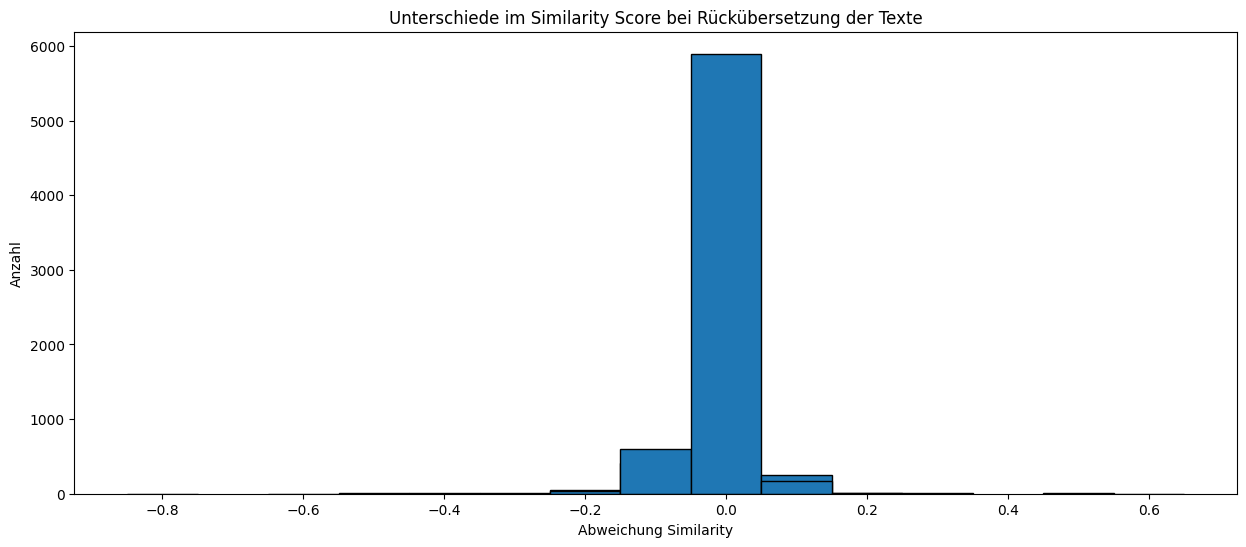

In [48]:
# Visualisierung der Abweichung des Similarity Scores bei Rückübersetzung
# Gruppieren der Abweichungen des Similarity Scores
similarity_difference_df = df_cleaned.groupby('Similarity_difference')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(similarity_difference_df['Similarity_difference'], similarity_difference_df['Anzahl'], width=0.1, edgecolor='black')
plt.title("Unterschiede im Similarity Score bei Rückübersetzung der Texte")
plt.xlabel('Abweichung Similarity')
plt.ylabel('Anzahl')
plt.show()

# Grammatikalische Prüfung

In [4]:
# Initialisierung von Java Home
os.environ['JAVA_HOME'] = 'C:\\Program Files\\Java\\jdk-22'
os.environ['PATH'] += os.pathsep + os.path.join(os.environ['JAVA_HOME'], 'bin')

# Festlegung der Sprache
tool = language_tool_python.LanguageTool('de-DE')

In [5]:
# Definiton der Funktion zur Prüfung der Grammatik
def check_grammar(text):

    # Grammatikprüfung durchführen
    matches = tool.check(text)

    if matches:
        errors = [f"Fehler: {match.ruleId}, Nachricht: {match.message}" for match in matches]
        suggestions = [f"Vorschlag: {', '.join(match.replacements)}" for match in matches if match.replacements]
        return errors, suggestions, "Fehler gefunden"
    else:
        return [], [], "Die grammatikalische Struktur des Textes ist gut."

In [10]:
# Nehmen einer Stichprobe
df_grammar = df_german.sample(3000).reset_index()

# Anwenden auf den Datensatz
df_grammar[['Grammar_Errors','Grammar_Suggestions', 'Grammar_Status']] = df_grammar['Translation'].apply(
    lambda text: pd.Series(check_grammar(text)))

# Ausgabe
df_grammar

,index,Source-Text,Translation,Language,Grammar_Errors,Grammar_Suggestions,Grammar_Status
0,3087,Watch the video where Jack Elkins talks about adidas Football X franchise.,"Sieh dir das Video an, in dem Jack Elkins über die adidas Football X Franchise spricht.",German,"[Fehler: GERMAN_SPELLER_RULE, Nachricht: Möglicher Tippfehler gefunden.]","[Vorschlag: Alkins, Beckens, Eigens, Elias, Eins, Elvis, Erging, Elis, Rückens, Jenkins, Wilkins, Eugens, Pickens, Skins, Nackens, Jelzins, Erwins, Delfins, Algin, Alkans]",Fehler gefunden
1,3604,LEGO® Grand Court,LEGO® Grand Court,German,[],[],Die grammatikalische Struktur des Textes ist gut.
2,3989,"The Moncler product will arrive in your stores pre-packaged. Please be aware of how it is packed and be sure to repack it in the appropriate boxes after purchase. Please store this packaging in a safe place where it will not get damaged, and take pictures or videos of how the product arrives (how it is folded and packed). This will help you and your store team to repackage it correctly and in the most premium way. The packaging will then be placed in your normal store bags or in the specific collab bags (if available).","Das Moncler-Produkt wird vorverpackt in Ihrem Geschäft ankommen. Bitte achten Sie darauf, wie es verpackt ist und verpacken Sie es nach dem Kauf wieder in die entsprechenden Kartons. Bitte bewahren Sie diese Verpackung an einem sicheren Ort auf, damit sie nicht beschädigt wird, und machen Sie Fotos oder Videos davon, wie das Produkt ankommt (wie es gefaltet und verpackt ist). Dies wird Ihnen und Ihrem Ladenteam helfen, das Produkt korrekt und hochwertig zu verpacken. Die Verpackung wird dann in Ihre normalen Ladentaschen oder in die speziellen Kollabotaschen (falls vorhanden) gelegt.",German,"[Fehler: GERMAN_SPELLER_RULE, Nachricht: Möglicher Tippfehler gefunden., Fehler: GERMAN_SPELLER_RULE, Nachricht: Möglicher Tippfehler gefunden.]","[Vorschlag: Kanzler-Produkt, Monster-Produkt]",Fehler gefunden
3,5173,Added propulsion and a snappy feel,Zusätzlicher Vortrieb und ein bissiges Gefühl,German,[],[],Die grammatikalische Struktur des Textes ist gut.
4,3477,"Woven from the collective memories of proud Jamaicans, the home jersey gives off '80s vibes with its pinstripe design and vibrant colour contrasts. The collar and sleeves feature Wales Bonner's signature flatknit details in the Jamaican flag colours.",Das aus den kollektiven Erinnerungen stolzer Jamaikaner gewebte Heimtrikot versprüht mit seinem Nadelstreifendesign und den leuchtenden Farbkontrasten 80er-Jahre-Stimmung. Der Kragen und die Ärmel sind mit den charakteristischen Flachstrick-Details von Wales Bonner in den Farben der jamaikanischen Flagge versehen.,German,[],[],Die grammatikalische Struktur des Textes ist gut.
...,...,...,...,...,...,...,...
2995,266,"Some of our most stylish bags, the Studio range features mirror gloss fabric. It includes totes and duffels that look at home in the office while hauling everything you need to slip out for a quick Pilates class after lunch.","Das Studio-Sortiment, das zu unseren stilvollsten Taschen gehört, besteht aus hochglänzendem Stoff. Sie umfasst Tragetaschen und Seesäcke, die sich im Büro gut machen und gleichzeitig alles transportieren, was Sie für einen schnellen Pilates-Kurs nach dem Mittagessen brauchen.",German,[],[],Die grammatikalische Struktur des Textes ist gut.
2996,7348,"Because they’re designed for elite players, authentic jerseys use more premium materials and technologies than regular jerseys. Any graphics and patterns are usually engineered into the fabric instead of printed onto it, which gives the jerseys a great handfeel (just touch one to feel the difference). You can wear authentic shirts as lifestyle jerseys, but they’re primed for performance — HEAT.RDY keeps you cool and dry, and heat-transfer details cut down on bulk and wind resistance.","Da authentische Trikots für Spitzenspieler entwickelt wurden, werden für sie hochwertigere Materialien und Techn

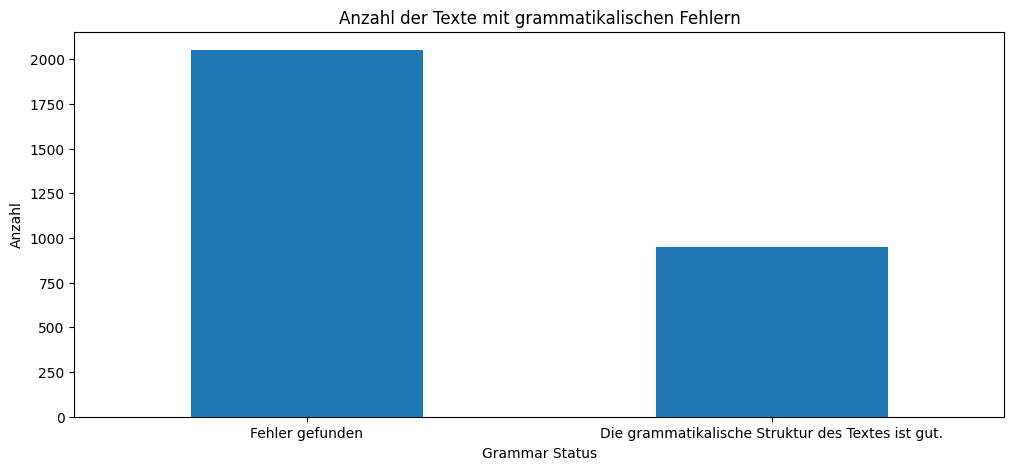

In [11]:
# Ermitteln der Fehlerhaften Texte
status_counts = df_grammar['Grammar_Status'].value_counts()

# Visualisierung
plt.figure(figsize=(12, 5))
status_counts.plot(kind='bar')

# Hinzufügen von Titeln und Beschriftungen
plt.title('Anzahl der Texte mit grammatikalischen Fehlern')
plt.xlabel('Grammar Status')
plt.ylabel('Anzahl')
plt.xticks(rotation=0)

# Ausgabe
plt.show()

In [14]:
# Droppen der grammatikalisch richtigen Texte
df_wrong_grammar = df_grammar[df_grammar['Grammar_Status'] != "Die grammatikalische Struktur des Textes ist gut."].reset_index().drop(columns=['Language', 'Grammar_Status', 'level_0'])

In [15]:
# Ein Satz kann mehrere Fehlermeldungen enthalten
wert = df_wrong_grammar.iloc[20, 3]
print("Die Fehlermeldungen für einen Satz können wie folgt aussehen:")
print(wert)

Die Fehlermeldungen für einen Satz können wie folgt aussehen:
['Fehler: DE_CASE, Nachricht: Außer am Satzanfang werden nur Nomen und Eigennamen großgeschrieben.', 'Fehler: DE_AGREEMENT, Nachricht: Möglicherweise passen das Nomen und die Wörter, die das Nomen beschreiben, grammatisch nicht zusammen.']


In [16]:
# Funktion zum Extrahieren der Error Messages
def extract_errors_and_messages(entries):
    errors = []
    messages = []
    for entry in entries:
        parts = entry.split(', Nachricht: ')
        if len(parts) == 2:
            errors.append(parts[0].replace('Fehler: ', ''))
            messages.append(parts[1])
    return errors, messages

In [17]:
# Leere Listen zum Speichern der Ergebnisse
all_ids = []
all_errors = []
all_messages = []

# Durchlaufe jede Zeile des DataFrames
for _, row in df_wrong_grammar.iterrows():
    errors, messages = extract_errors_and_messages(row['Grammar_Errors'])
    all_ids.extend([row['index']] * len(errors))
    all_errors.extend(errors)
    all_messages.extend(messages)

# Erstelle einen neuen DataFrame
result_df = pd.DataFrame({
    'index': all_ids,
    'Fehler': all_errors,
    'Nachrichten': all_messages
})

# Neue DataFrame mit explodierten Listen erstellen
exploded_df = result_df.explode('Fehler').explode('Nachrichten').reset_index(drop=True)


Es gibt 69 verschiedene Fehlermeldungen
Die Top 10 Fehlermeldungen sind: 
Fehler
GERMAN_SPELLER_RULE              13836
DE_CASE                           1721
WHITESPACE_RULE                   1496
EINHEIT_LEERZEICHEN               1265
DE_SENTENCE_WHITESPACE             934
DOPPELTES_LEERZEICHEN              625
DE_DU_UPPER_LOWER                  185
EMPFOHLENE_ZUSAMMENSCHREIBUNG      176
KLEIN_NACH_PUNKT                    84
DE_AGREEMENT                        72
Name: count, dtype: int64


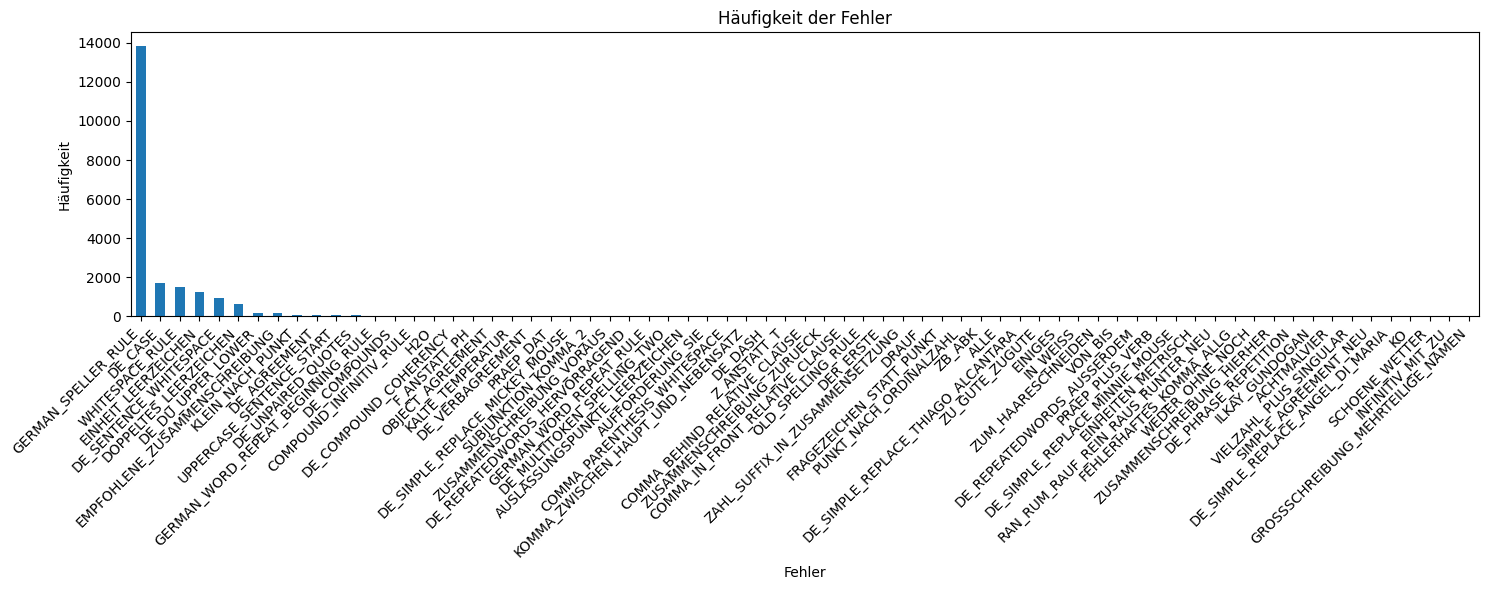

In [18]:
# Anzahl der Fehlermeldungen
error_counts = exploded_df['Fehler'].value_counts()
print(f"Es gibt {len(error_counts)} verschiedene Fehlermeldungen")
print("Die Top 10 Fehlermeldungen sind: ")
print(error_counts.head(10))

# Balkendiagramm erstellen
plt.figure(figsize=(15, 6))
error_counts.plot(kind='bar')

# Diagramm beschriften
plt.title('Häufigkeit der Fehler')
plt.xlabel('Fehler')
plt.ylabel('Häufigkeit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Ausgabe
plt.show()

In [19]:
# Anzahl der Nachrichten zu den Fehelermeldungen
message_counts = exploded_df['Nachrichten'].value_counts()
print(f"Eine Fehlermeldung kann unterschiedliche Nachrichten haben. Die {len(error_counts)} verschiedene Fehlermeldungen, haben {len(message_counts)} verschiedene Nachrichten")
print("Die Top 10 Nachrichten zu den Fehlermeldungen sind sind: ")
message_counts.head(10)

Eine Fehlermeldung kann unterschiedliche Nachrichten haben. Die 69 verschiedene Fehlermeldungen, haben 134 verschiedene Nachrichten
Die Top 10 Nachrichten zu den Fehlermeldungen sind sind: 


Nachrichten
Möglicher Tippfehler gefunden.                                                                                  13835
Außer am Satzanfang werden nur Nomen und Eigennamen großgeschrieben.                                             1714
Möglicher Tippfehler: mehr als ein Leerzeichen hintereinander                                                    1496
Vor Einheitenzeichen sollte ein Leerzeichen gesetzt werden.                                                      1265
Fügen Sie zwischen Sätzen ein Leerzeichen ein.                                                                    933
Hier scheint ein Leerzeichen zu viel zu sein.                                                                     625
Vorher wurde bereits ‚DICH‘ großgeschrieben. Aus Gründen der Einheitlichkeit ‚Dich‘ hier auch großschreiben?       92
Hier scheint ein Leerzeichen zu fehlen. Wenn ein neuer Satz beginnt, muss das Wort großgeschrieben werden.         84
Empfehlung: Möchten Sie die Schreibweise „wo

In [20]:
# Gruppiere nach 'Fehler' und 'Nachrichten' und zähle die Anzahl der Nachrichten
grouped_grammar_df = exploded_df.groupby(['Fehler', 'Nachrichten']).size().reset_index(name='Anzahl Nachricht')#.sort_values(by='Anzahl Nachricht', ascending=False)
grouped_grammar_df.head(22)

,Fehler,Nachrichten,Anzahl Nachricht
0,ACHTMALVIER,"Bitte prüfen Sie die Getrenntschreibung: Außer man möchte „Mal“ besonders betonen, sollte „viermal“ zusammengeschrieben werden.",1
1,ALLE,Außer in der Redewendung „Ein und Alles“ wird dieses Wort immer kleingeschrieben.,1
2,AUFFORDERUNG_SIE,"Meinten Sie die großgeschriebene Höflichkeitsform „Sie“? Sollte es sich bei diesem Satz um eine Frage handeln, verwenden Sie bitte ein Fragezeichen am Satzende.",3
3,AUSLASSUNGSPUNKTE_LEERZEICHEN,"Vor Auslassungspunkten sollte in der Regel ein geschütztes Leerzeichen stehen, außer wenn es sich um eine Auslassung im Wortinneren handelt.",3
4,COMMA_BEHIND_RELATIVE_CLAUSE,Sollten Sie hier ein Komma einfügen?,3
5,COMMA_IN_FRONT_RELATIVE_CLAUSE,Sowohl angehängte als auch eingeschobene Relativsätze werden durch Kommas vom Hauptsatz getrennt.,2
6,COMMA_PARENTHESIS_WHITESPACE,"Nur hinter einem Komma steht ein Leerzeichen, aber nicht davor.",1
7,COMMA_PARENTHESIS_WHITESPACE,Vor dem Punkt sollte kein Leerzeichen stehen.,2
8,COMPOUND_INFINITIV_RULE,"Wenn der erweiterte Infinitiv von dem Verb ‚bereithalten‘ abgeleitet ist, sollte er zusammengeschrieben werden.",2
9,COMPOUND_INFINITIV_RULE,"Wenn der erweiterte Infinitiv von dem Verb ‚bereitmachen‘ abgeleitet ist, sollte er zusammengeschrieben werden.",1


In [21]:
# Heufigste Fehler mit dazugehöriger Nachricht
grouped_grammar_sort_df = grouped_grammar_df.sort_values(by='Anzahl Nachricht', ascending=False)
grouped_grammar_sort_df.head(10)

,Fehler,Nachrichten,Anzahl Nachricht
86,GERMAN_SPELLER_RULE,Möglicher Tippfehler gefunden.,13835
23,DE_CASE,Außer am Satzanfang werden nur Nomen und Eigennamen großgeschrieben.,1714
120,WHITESPACE_RULE,Möglicher Tippfehler: mehr als ein Leerzeichen hintereinander,1496
65,EINHEIT_LEERZEICHEN,Vor Einheitenzeichen sollte ein Leerzeichen gesetzt werden.,1265
52,DE_SENTENCE_WHITESPACE,Fügen Sie zwischen Sätzen ein Leerzeichen ein.,933
61,DOPPELTES_LEERZEICHEN,Hier scheint ein Leerzeichen zu viel zu sein.,625
44,DE_DU_UPPER_LOWER,Vorher wurde bereits ‚DICH‘ großgeschrieben. Aus Gründen der Einheitlichkeit ‚Dich‘ hier auch großschreiben?,92
97,KLEIN_NACH_PUNKT,"Hier scheint ein Leerzeichen zu fehlen. Wenn ein neuer Satz beginnt, muss das Wort großgeschrieben werden.",84
73,EMPFOHLENE_ZUSAMMENSCHREIBUNG,Empfehlung: Möchten Sie die Schreibweise „wohlfühlst“ verwenden?,79
116,UPPERCASE_SENTENCE_START,Dieser Satz fängt nicht mit einem großgeschriebenen Wort an.,64


# Named Entity Recognition (mit Spacy)

Erläuterung der Klassifizierung:
- PERSON: Personen (z.B. "Angela Merkel").
- ORG: Organisationen (z.B. "Apple", "UN").
- GPE: Geopolitische Entitäten (Länder, Städte, Bundesstaaten, z.B. "Deutschland", "Berlin").
- LOC: Orte (z.B. "Mount Everest").
- DATE: Daten (z.B. "2021-08-01").
- TIME: Zeiten (z.B. "13:00").
- MONEY: Geldbeträge (z.B. "100 Euro").
- PERCENT: Prozentsätze (z.B. "50%").
- QUANTITY: Mengenangaben (z.B. "2 Liter").
- ORDINAL: Ordinalzahlen (z.B. "erster").
- CARDINAL: Kardinalzahlen (z.B. "zwei").
- PRODUCT: Produkte (z.B. "iPhone").
- EVENT: Ereignisse (z.B. "Olympische Spiele").
- WORK_OF_ART: Kunstwerke (z.B. "Die Mona Lisa").
- LAW: Gesetze (z.B. "Grundgesetz").
- LANGUAGE: Sprachen (z.B. "Deutsch").
- NORP: Nationalitäten, Organisationen, religiöse oder politische Gruppen (z.B. "Amerikaner").

Dies kann für folgende Sprachen verwendet werden:

Arabisch, 
Englisch,
Französisch,
Deutsch,
Italienisch,
Niederländisch,
Polnisch,
Portugiesisch,
Rumänisch,
Schwedisch,
Spanisch,
Griechisch

In [28]:
# Laden der Modelle
nlp_en = spacy.load("en_core_web_md")
nlp_de = spacy.load("de_core_news_md")

In [43]:
# Funktion zur Prüfung der Eigennamen
def named_entity_recognition(text, nlp_model):

    # Textanalyse
    doc = nlp_model(text)
    
    # Listen für Entitäten und Labels
    entities = []
    labels = []

    # Festlegen der gewünschten Kathegorien
    filter_labels = ["PERSON", "ORG", "GPE", "PRODUCT", "EVENT"]
    
    # Iteration über erkannte Entitäten
    for entity in doc.ents:
        if entity.label_ in filter_labels:
            entities.append(entity.text)
            labels.append(entity.label_)
    
    return entities, labels

In [52]:
# Nehmen einer Stichprobe
df_name = df_german.copy()

# Anwendung der Named Entity Recognition auf jeden Text im DataFrame
df_name[['Entities_englisch', 'Labels_englisch']] = df_name['Translation'].apply(lambda x: pd.Series(named_entity_recognition(x, nlp_de)))
df_name[['Entities_german', 'Labels_german']] = df_name['Source-Text'].apply(lambda x: pd.Series(named_entity_recognition(x, nlp_en)))

# Löschen der Zeilen, welche keines der Kategorien enthalten
df_name = df_name[~((df_name['Labels_englisch'].apply(lambda x: x == [])) & (df_name['Labels_german'].apply(lambda x: x == [])))]

# Ausgabe
df_name.head(3)

,Source-Text,Translation,Language,Entities_englisch,Labels_englisch,Entities_german,Labels_german
0,"Model number: 11PRO FGSports category: FOOTBALL/SOCCERLimited-collection 11Pro boots, with a recreation of the original upper.Step into the journey of the 11Pro boots and commemorate their 10th-anniversary launch with this exclusive limited edition. The 11Pro Firm Ground boots are part of a collection that celebrates the unbreakable bond between a football player and his footwear. Crafted with meticulous attention to detail, the modern Copa Pure firm ground outsole stabilizes movement, while the Taurus leather upper creates a soft touch and optimal comfort. The lace closure design provides a secure fit and recreates the design of the boots that German playmaker Toni Kroos fell in love with all those years ago.SPECIFICATIONSRegular fitLace closureFirm ground outsoleTouchpodsSensepodsTaurus leather upperArticle numbers: IG0776DETAILSRetail entry: 15 Oct 2023","Modellnummer: 11PRO FGSportkategorie: FOOTBALL/FUSSBALLLimitierte 11Pro-Kollektion mit einer Nachbildung des Original-Obermaterials.Mit dieser exklusiven, limitierten Auflage feiern wir das 10-jährige Jubiläum der 11Pro-Stiefel. Die 11Pro Firm Ground-Stiefel sind Teil einer Kollektion, die die untrennbare Verbindung zwischen einem Fußballspieler und seinem Schuhwerk zelebriert. Die mit viel Liebe zum Detail gefertigte moderne Copa Pure Firm Ground-Außensohle stabilisiert die Bewegung, während das Obermaterial aus Taurus-Leder einen weichen Griff und optimalen Komfort bietet. Der Schnürverschluss sorgt für einen sicheren Sitz und ist dem Design der Schuhe nachempfunden, in die sich der deutsche Spielmacher Toni Kroos vor vielen Jahren verliebt hat.SPEZIFIKATIONENNormale PassformSchnürverschlussFeste LaufsohleTouchpodsSensepodsObermaterial aus Taurus-LederArtikel-Nummern: IG0776DETAILSEintritt in den Einzelhandel: 15 Okt 2023",German,"[FOOTBALL, Ground-Außensohle]","[ORG, ORG]","[Copa Pure, Taurus, Toni Kroos, SPECIFICATIONSRegular fitLace]","[PRODUCT, PRODUCT, PERSON, ORG]"
1,DOWNLOAD PRODUCT SHEET,PRODUKTDATENBLATT HERUNTERLADEN,German,[PRODUKTDATENBLATT],[ORG],[],[]
4,"Model number: WU661Sports category: CoreA quarter-zip pullover done in cosy fleece material.With comfort as a foundation, there's a lot you can do. Which includes doing absolutely nothing other than enjoying it. This adidas sweatshirt is down for whatever mode you choose to sink into. Fast, slow or somewhere in between — soft fleece material makes sure you feel good no matter what you're doing. Our cotton products support more sustainable cotton farming.SPECIFICATIONSRegular fitQuarter zip with ribbed stand-up collar82% cotton, 18% recycled polyester fleeceRibbed cuffs and hemSupports the Better Cotton InitiativeArticle number: HG2074, HN1945, HN1942DETAILSRETAIL ENTRY: 2022-08-15SUSTAINABILITY: ""BETTER COTTON""","Modellnummer: WU661Sportkategorie: CoreEin Viertel-Reißverschluss-Pullover aus kuscheligem Fleecematerial.Mit Komfort als Grundlage kann man eine Menge machen. Dazu gehört auch, absolut nichts zu tun, außer es zu genießen. Dieses Sweatshirt von adidas ist für jeden Modus geeignet, in den du dich stürzen willst. Schnell, langsam oder irgendwo dazwischen - das weiche Fleece-Material sorgt dafür, dass du dich wohlfühlst, egal was du tust. Unsere Baumwollprodukte unterstützen den nachhaltigen Baumwollanbau.SPEZIFIKATIONENNormale PassformViertelreißverschluss mit geripptem Stehkragen82% Baumwolle, 18% recyceltes Polyester-FleeceGerippte Bündchen und SaumUnterstützt die Better Cotton InitiativeArtikel-Nummer: HG2074, HN1945, HN1942DETAILSHANDELSEINGANG: 2022-08-15NACHHALTIGKEIT: ""BESSERE BAUMWOLLE""",German,"[adidas, HN1942DETAILSHANDELSEINGANG, BESSERE BAUMWOLLE]","[ORG, ORG, ORG]","[SPECIFICATIONSRegular fitQuarter, HG2074, HN1945, HN1942DETAILSRETAIL]","[PERSON, EVENT, ORG, ORG]"


In [72]:
# Selection der Labels (Englische Texte)
labels_englisch_list = [item for sublist in df_name['Labels_englisch'] for item in sublist]
labels_englisch_value = Counter(labels_englisch_list)

# Ausgabe
print(f"Die englischen Texte enhalten folgende Kategorien:")
labels_englisch_value


Die englischen Texte enhalten folgende Kategorien:


Counter({'ORG': 10676})

Es enthalten 5295 von 7630 Texten eine Kategorie


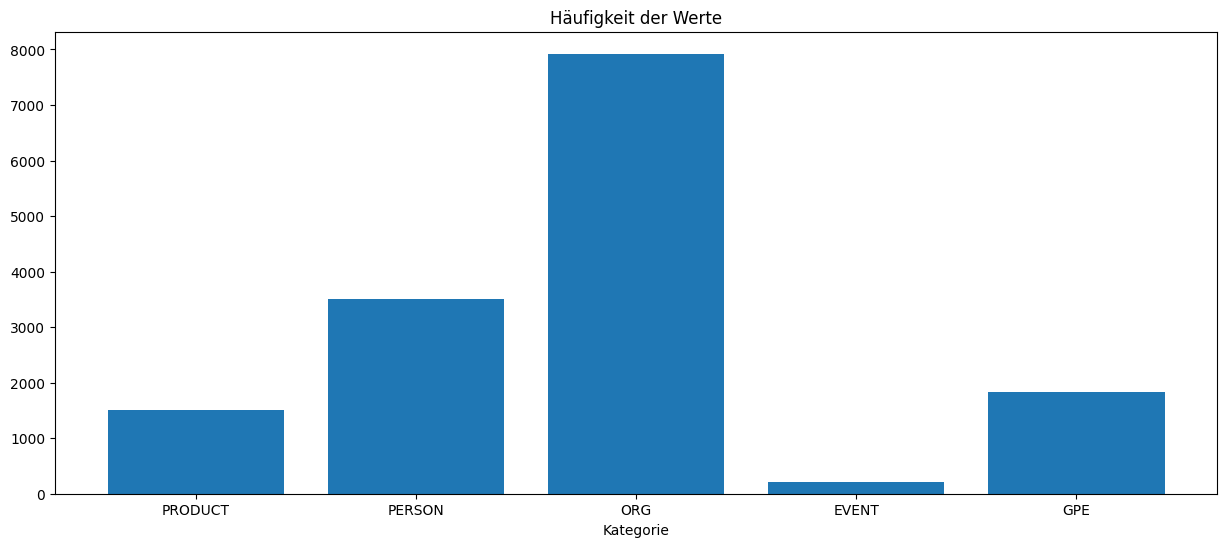

In [71]:
# Selection der Labels (Deutsche Texte)
labels_german_list = [item for sublist in df_name['Labels_german'] for item in sublist]
labels_german_value = Counter(labels_german_list)

# Data Frame
labels_german_df = pd.DataFrame(labels_german_value.items(), columns=['Wert', 'Anzahl'])

# Balkendiagramm erstellen
plt.figure(figsize=(15, 6))
plt.bar(labels_german_df['Wert'], labels_german_df['Anzahl'])
plt.xlabel('Kategorie')
plt.title('Häufigkeit der Werte')

# Ausgabe
print(f"Es enthalten {len(df_name)} von {len(df_german)} Texten eine Kategorie")
plt.show()

# Redability

## flesch reading ease

In [73]:
# Erstellen der Score Bereiche
data_readability = {
     "Score": ["101-121", "90-100", "80-89", "70-79", "60-69", "50-59", "30-49", " <0-29"],
     "Difficulty": ["Grundschule", "5 Klasse", "6 Klasse", "7 Klasse", "8/9 Klasse", "10/12 Klasse", "Hochschulstudenten", "Hochschulabsolventen"],
     "Color": ["darkgreen", "green", "lightgreen", "yellowgreen", "yellow", "orange", "red", "darkred"]
}
df_readability = pd.DataFrame(data_readability)

# Erstellen von Intervallen basierend auf den Score-Bereichen
score_bins = [-500, 29, 49, 59, 69, 79, 89, 100, 121]
score_labels = df_readability['Difficulty']

In [74]:
# Definiere der Funktion
def flesch_reading_ease(translated_text):
    return textstat.flesch_reading_ease(translated_text)

In [75]:
df_readability = df_german.copy()

C:\Users\sandra.nuissl\AppData\Local\Temp\ipykernel_20736\2513328131.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  german_grouped_df = df_readability.groupby('Difficulty_german').agg({


Text(0, 0.5, 'Anzahl')

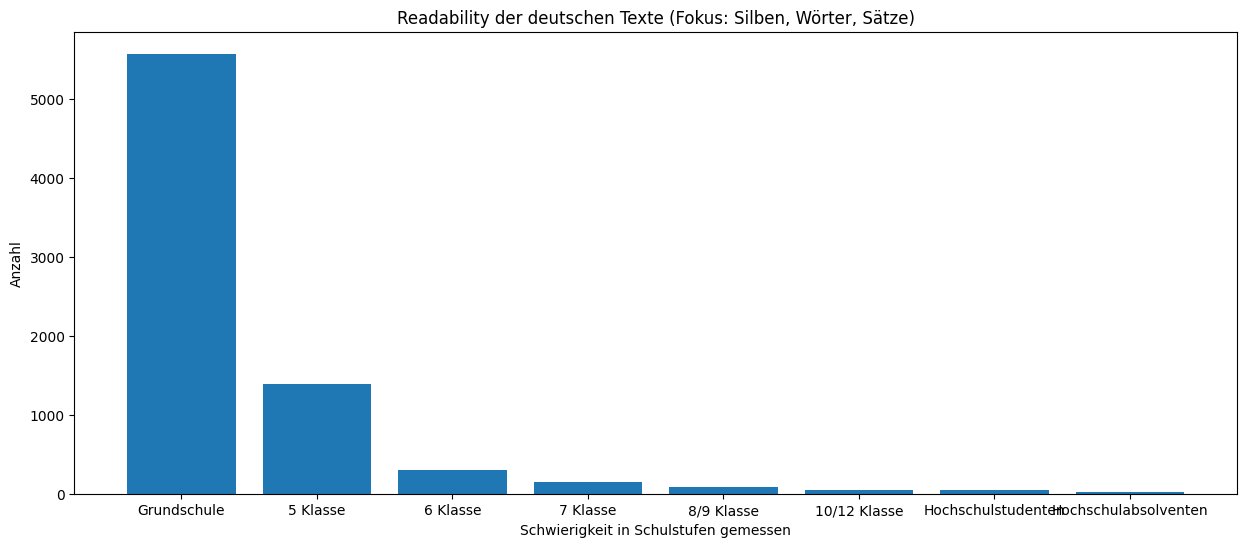

In [77]:
# Readability Deutsch
# Setzen der sprachen
lang = "de-DE"
textstat.set_lang(lang)

# Anwendung der Funktion auf deutschen Text
df_readability['flesch_reading_ease_german'] = df_readability['Translation'].apply(flesch_reading_ease)

# Ergänzung der Score Bezeichnungen
df_readability['Difficulty_german'] = pd.cut(df_readability['flesch_reading_ease_german'], bins=score_bins, labels=score_labels)

# Graphik
# Gruppieren nach Score Stufen
german_grouped_df = df_readability.groupby('Difficulty_german').agg({
    'flesch_reading_ease_german': 'count',
}).reset_index().rename(columns={'flesch_reading_ease_german': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(german_grouped_df['Difficulty_german'], german_grouped_df['Anzahl'])
plt.title("Readability der deutschen Texte (Fokus: Silben, Wörter, Sätze)")
plt.xlabel('Schwierigkeit in Schulstufen gemessen')
plt.ylabel('Anzahl')

C:\Users\sandra.nuissl\AppData\Local\Temp\ipykernel_20736\2897466962.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  english_grouped_df = df_readability.groupby('Difficulty_english').agg({


Text(0, 0.5, 'Anzahl')

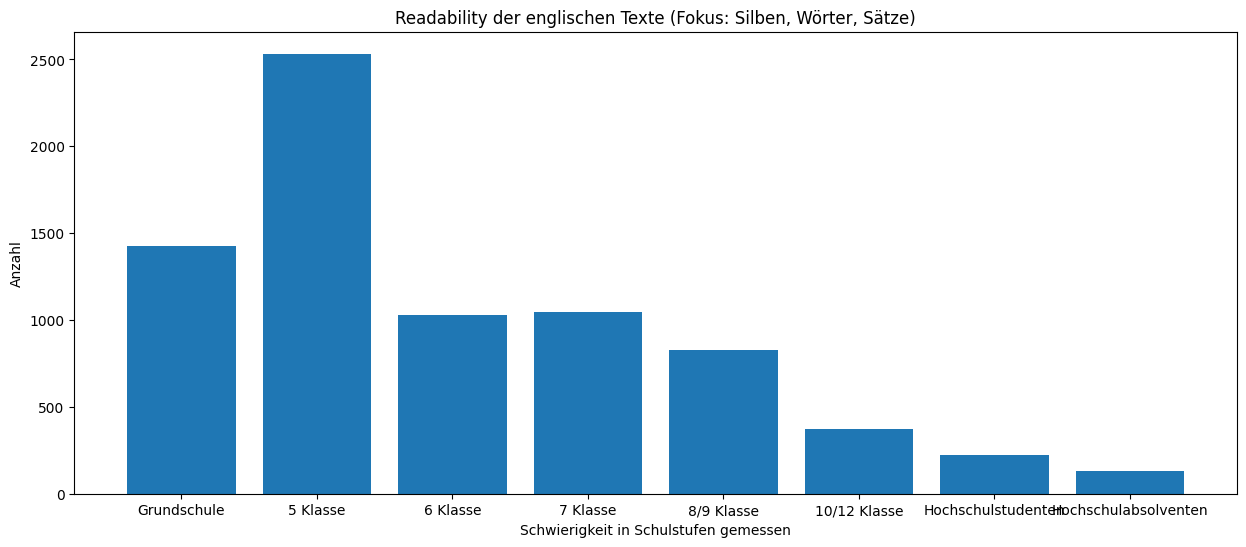

In [78]:
# Readability Englisch
# Setzen der sprachen
lang = "en-US"
textstat.set_lang(lang)

# Anwendung der Funktion auf deutschen Text
df_readability['flesch_reading_ease_english'] = df_readability['Translation'].apply(flesch_reading_ease)

# Ergänzung der Score Bezeichnungen
df_readability['Difficulty_english'] = pd.cut(df_readability['flesch_reading_ease_english'], bins=score_bins, labels=score_labels)

# Graphik
# Gruppieren nach Score Stufen
english_grouped_df = df_readability.groupby('Difficulty_english').agg({
    'flesch_reading_ease_english': 'count',
}).reset_index().rename(columns={'flesch_reading_ease_english': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(english_grouped_df['Difficulty_english'], english_grouped_df['Anzahl'])
plt.title("Readability der englischen Texte (Fokus: Silben, Wörter, Sätze)")
plt.xlabel('Schwierigkeit in Schulstufen gemessen')
plt.ylabel('Anzahl')

## Wiener Sachtextformel

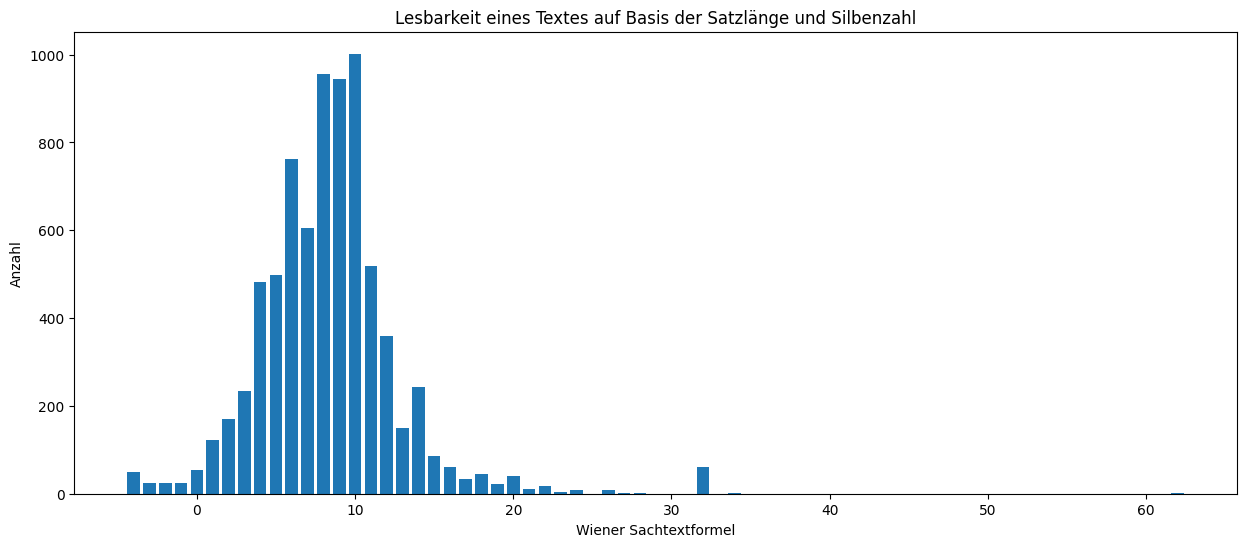

In [81]:
# Definiere der Funktion
def wiener_sachtextformel(translated_text):
    return textstat.wiener_sachtextformel(translated_text, variant=1)

# Herausfiltern der leeren Werte
t_list = df_readability.Translation.to_list()
error_list = []
for el in t_list:
    try:
        vienna = textstat.wiener_sachtextformel(el, variant=1)
    except:
        error_list.append(el)

df_readability = df_readability[~df_readability['Translation'].isin(error_list)]

# Anwendung der Funktion
df_readability['wiener_sachtextformel'] = df_readability['Translation'].apply(wiener_sachtextformel)
df_readability['wiener_sachtextformel'] = df_readability['wiener_sachtextformel'].round().astype(int)

# Graphik
# Gruppieren nach Score Stufen
ws_grouped_df = df_readability.groupby('wiener_sachtextformel')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(ws_grouped_df['wiener_sachtextformel'], ws_grouped_df['Anzahl'])
plt.title("Lesbarkeit eines Textes auf Basis der Satzlänge und Silbenzahl")
plt.xlabel('Wiener Sachtextformel')
plt.ylabel('Anzahl')
plt.show()

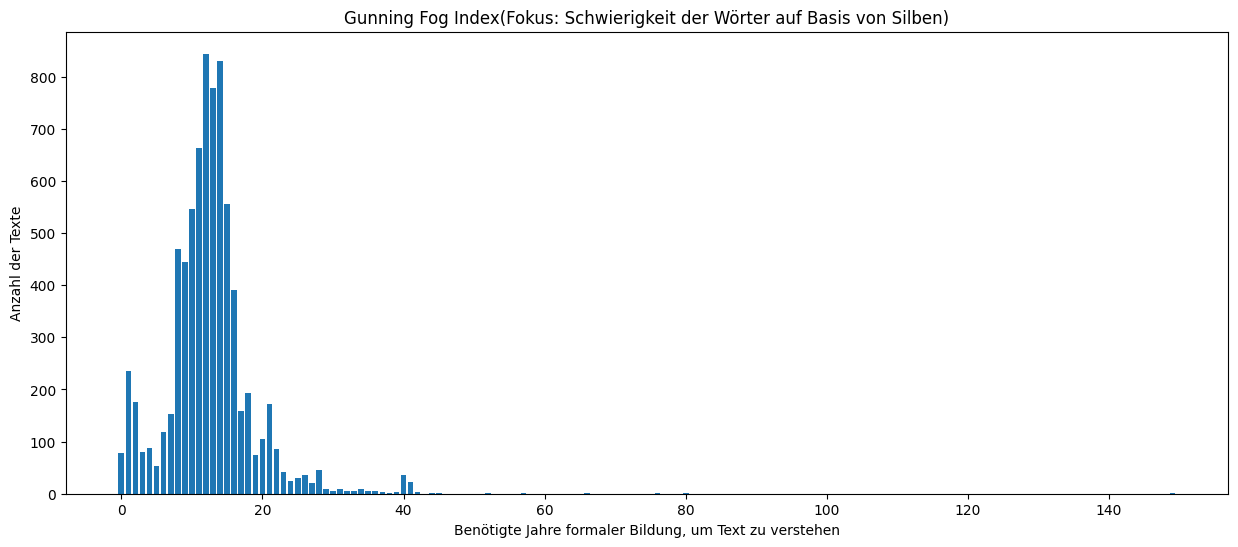

In [84]:
# Definiere der Funktion
def gunning_fog(translated_text):
    return textstat.gunning_fog(translated_text)

# Anwendung der Funktion
df_readability['gunning_fog'] = df_readability['Translation'].apply(gunning_fog)
df_readability['gunning_fog'] = df_readability['gunning_fog'].round().astype(int)

# Graphik
# Gruppieren nach Score Stufen
gf_grouped_df = df_readability.groupby('gunning_fog')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(gf_grouped_df['gunning_fog'], gf_grouped_df['Anzahl'])
plt.title("Gunning Fog Index(Fokus: Schwierigkeit der Wörter auf Basis von Silben)")
plt.xlabel('Benötigte Jahre formaler Bildung, um Text zu verstehen')
plt.ylabel('Anzahl der Texte')
plt.show()

## Dale Call Deutsch

In [98]:
# Übersetzen der englischen Dale Call Liste ins Deutsche
# https://readabilityformulas.com/word-lists/the-dale-chall-word-list-for-readability-formulas/#google_vignette

# Laden der englischen Liste
with open('Data/simple_words.txt', 'r', encoding='utf-8') as file:
    simple_words_en = file.readlines()

simple_words_en = [line.strip() for line in simple_words_en]

In [102]:
# Übersetze die Liste ins Deutsche
simple_words_de = [GoogleTranslator(source='en', target='de').translate(word) for word in simple_words_en]

In [117]:
# Definition der Dale Call Funktion (für die deutsche Sprache)
def dale_chall_readability_score_de(text):

    # Laden der einfachen Wörter
    simple_words = simple_words_de

    # Aufteilen des Textes in Sätze und Wörter
    sentences = re.split(r'[.!?]', text)
    sentences = [s.strip() for s in sentences if s.strip()]
    words = re.findall(r'\b\w+\b', text.lower())
    
    num_sentences = len(sentences)
    num_words = len(words)
    num_difficult_words = sum(1 for word in words if word not in simple_words)

    if num_words == 0 or num_sentences == 0:
        return float('nan')

    # Berechnung des Dale-Chall-Scores
    percent_difficult_words = (num_difficult_words / num_words) * 100
    score = 0.1579 * percent_difficult_words + 0.0496 * (num_words / num_sentences)

    if score >= 5:
        score += 3.636

    return round(score, 0)

# Anwendung der Funktion
df_readability['dale_call'] = df_readability['Translation'].apply(dale_chall_readability_score_de)

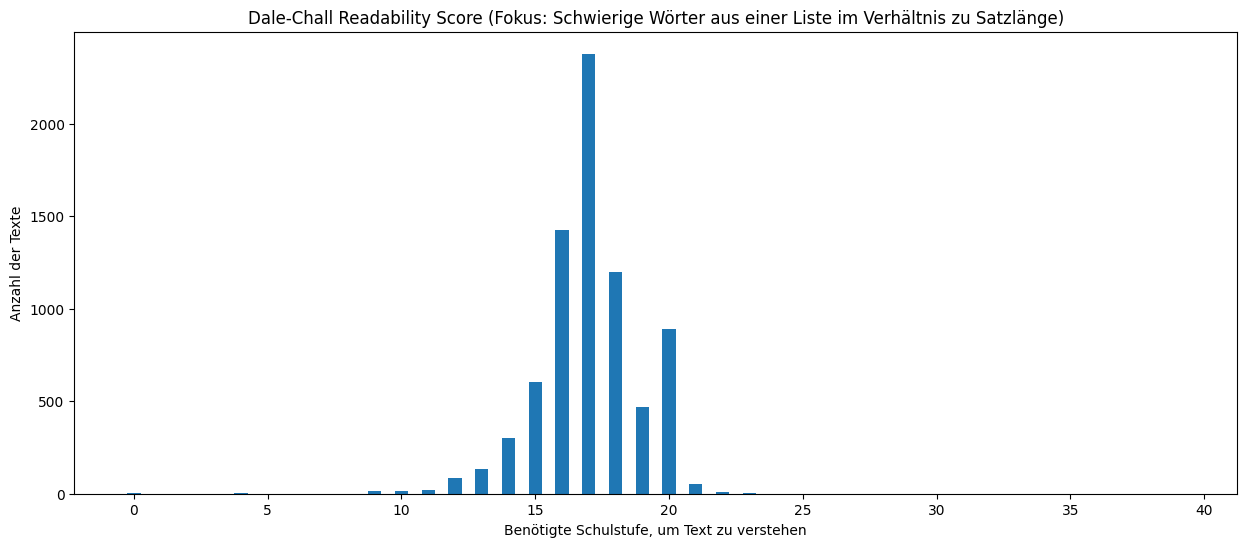

In [122]:
# Graphik
# Gruppieren nach Score Stufen
dcrs_grouped_df = df_readability.groupby('dale_call')['Language'].count().reset_index().rename(columns={'Language': 'Anzahl'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(dcrs_grouped_df['dale_call'], dcrs_grouped_df['Anzahl'], width=0.5)
plt.title("Dale-Chall Readability Score (Fokus: Schwierige Wörter aus einer Liste im Verhältnis zu Satzlänge)")
plt.xlabel('Benötigte Schulstufe, um Text zu verstehen')
plt.ylabel('Anzahl der Texte')
plt.show()

In [124]:
difficult = df_readability[df_readability['dale_call'] == 10]['Translation']
print(difficult)

224                                                                                                  TESTEN SIE HIER IHR WISSEN
1275                                                                                               QUIZ - TESTEN SIE IHR WISSEN
1763                                                                                     UM SIE KINDERFREUNDLICHER ZU GESTALTEN
2022                                               Laufen Sie hart und fühlen Sie sich sicher, uneingeschränkt und unaufhaltsam
3003                                                                                        Es ist nicht zu eng oder zu locker.
4647                                                                          Mehr Kontrolle bei jeder Aktion auf dem Spielfeld
4834                                                                                           - Schützt dich vor den Elementen
4835                                                                                    Unsere Isolierte

# Reading Time

In [26]:
# Definiere der Funktion
def reading_time(translated_text):
    return textstat.reading_time(translated_text)

# Anwendung der Funktion
df_time = df_german.copy()
df_time['reading_time'] = df_time['Translation'].apply(reading_time)
df_time['reading_time'] = df_time['reading_time'].round().astype(int)


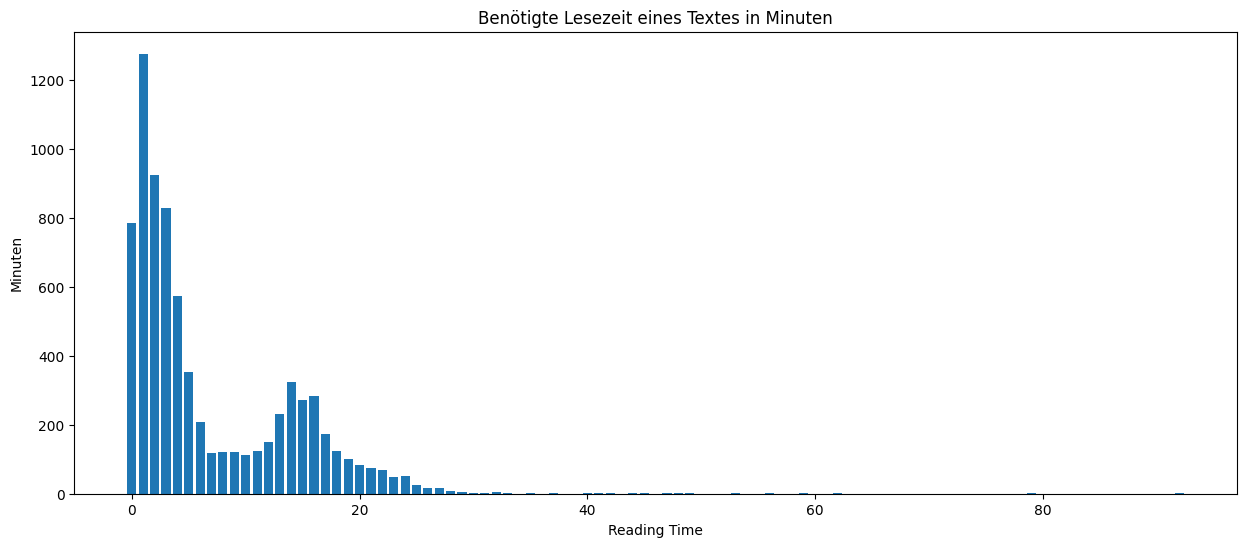

In [27]:
# Graphik
# Gruppieren nach Score Stufen
time_grouped_df = df_time.groupby('reading_time')['Language'].count().reset_index().rename(columns={'Language': 'Minuten'})

# Ausgabe
plt.figure(figsize=(15, 6))
plt.bar(time_grouped_df['reading_time'], time_grouped_df['Minuten'])
plt.title("Benötigte Lesezeit eines Textes in Minuten")
plt.xlabel('Reading Time')
plt.ylabel('Minuten')
plt.show()